In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # matplotlib içerisindeki pyplot modülünü plt olarak import ettik
import matplotlib as mpl # sadece matplotlibi import etmek etmek için kullanırız

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Exercise DataSet

Pandas’ın exercise dataset’i, genelde kişilerin spor yapma aktivitelerini içeren küçük ve basit bir örnek veri setidir. Öğrenme amaçlı (özellikle pandas ile veri manipülasyonu ve analiz pratikleri için) kullanılır.

Veri setinde şu sütunlar var:

***Unnamed: 0*** → Otomatik oluşturulmuş index sütunu (gereksiz, drop edebilirsin).

***id*** → Katılımcı numarası (1, 2, 3 …).

***diet*** → Katılımcının diyet tipi (ör: low fat, no fat).

***pulse*** → Nabız (egzersiz sırasında ölçülen).

***time*** → Egzersiz süresi (1 min, 15 min, 30 min).

***kind*** → Egzersiz türü (rest, walking, running).

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
exercise = sns.load_dataset('exercise')
exercise # exercise data setini çağırdı

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [5]:
exercise.drop('Unnamed: 0', axis = 1, inplace = True)
exercise # unnamed adındaki eski index sütununu drop ile sildik

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


In [6]:
exercise.head() # ilk 5 satırı çağırdık

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [7]:
exercise.tail() # son 5 satırı çağırdık

,id,diet,pulse,time,kind
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running
89,30,no fat,150,30 min,running


In [8]:
exercise.sample(3) # rastgele 3 satırı çağırdık

,id,diet,pulse,time,kind
42,15,low fat,89,1 min,walking
56,19,no fat,100,30 min,walking
7,3,low fat,97,15 min,rest


In [9]:
exercise.shape # satır sütun sayısına baktık

(90, 5)

In [10]:
exercise.ndim # boyutuna baktık

2

In [11]:
exercise.size # toplam kaç elemanlı olduğuna baktık

450

In [12]:
exercise.info() # genel değerlendirmesine baktık

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      90 non-null     int64   
 1   diet    90 non-null     category
 2   pulse   90 non-null     int64   
 3   time    90 non-null     category
 4   kind    90 non-null     category
dtypes: category(3), int64(2)
memory usage: 2.2 KB


In [13]:
exercise.describe() # özet istatistiksel bilgi aldık

,id,pulse
count,90.000000,90.000000
mean,15.500000,99.700000
std,8.703932,14.858471
min,1.000000,80.000000
25%,8.000000,90.250000
50%,15.500000,96.000000
75%,23.000000,103.000000
max,30.000000,150.000000


In [14]:
exercise.corr(numeric_only = True) # corelasyon hesapladık

,id,pulse
id,1.000000,0.679012
pulse,0.679012,1.000000


In [15]:
exercise.dtypes # sütunların types bilgisini aldık

id          int64
diet     category
pulse       int64
time     category
kind     category
dtype: object

In [16]:
exercise.columns # columns isimlerine baktık

Index(['id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

In [17]:
exercise.index # index bilgisi aldık

RangeIndex(start=0, stop=90, step=1)

In [18]:
exercise.pulse.mean() # pulse değerlerin ortalamasını aldık

np.float64(99.7)

In [19]:
exercise.kind.unique() # kind sütunu unique değerlere baktık

['rest', 'walking', 'running']
Categories (3, object): ['rest', 'walking', 'running']

In [20]:
exercise.diet.unique() # diet sütunu unique değerlere baktık

['low fat', 'no fat']
Categories (2, object): ['no fat', 'low fat']

In [21]:
exercise.diet.value_counts() # diet sütunu değer sayısı 

diet
no fat     45
low fat    45
Name: count, dtype: int64

In [22]:
exercise.kind.value_counts() # kind sütunu değer sayısı 

kind
rest       30
walking    30
running    30
Name: count, dtype: int64

In [23]:
exercise.time = exercise.time.str.strip('min').astype('int')
exercise.sample()

,id,diet,pulse,time,kind
56,19,no fat,100,30,walking


In [24]:
exercise.id.value_counts() # id sütununda kaç kişi kaç kez çalışmış gösterdi

id
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
29    3
30    3
Name: count, dtype: int64

In [25]:
exercise.time.max() #  time serisinde süresi en büyük olan değeri buldu

30

In [26]:
exercise['kind'] == 'running' # egzersiz olarak koşu olanları True/False getirdi

0     False
1     False
2     False
3     False
4     False
      ...  
85     True
86     True
87     True
88     True
89     True
Name: kind, Length: 90, dtype: bool

In [27]:
exercise[(exercise.time == 30) & (exercise['kind'] == 'running')] # en uzun süre koşu egzersizi yapanların listesi

,id,diet,pulse,time,kind
62,21,low fat,110,30,running
65,22,low fat,112,30,running
68,23,low fat,99,30,running
71,24,low fat,120,30,running
74,25,low fat,116,30,running
77,26,no fat,143,30,running
80,27,no fat,140,30,running
83,28,no fat,140,30,running
86,29,no fat,130,30,running
89,30,no fat,150,30,running


In [28]:
exercise[exercise['diet'] == 'no fat']['time'].mean() # no fat diet yapanların ort egzersiz süresi

np.float64(15.333333333333334)

In [29]:
exercise[exercise['diet'] == 'no fat']['pulse'].mean() # no fat diet yapanların ort nabız süresi

np.float64(103.44444444444444)

In [30]:
exercise[exercise['diet'] == 'low fat']['pulse'].mean() # low fat diet yapanların ort nabız süresi

np.float64(95.95555555555555)

- low fat diet yapanların ortalama nabzı no fat diyet yapanlardan düşük

In [31]:
exercise[exercise['id'] == 5] # id = 5  olan kişinin tüm egzersizleri

,id,diet,pulse,time,kind
12,5,low fat,91,1,rest
13,5,low fat,92,15,rest
14,5,low fat,91,30,rest


In [32]:
exercise[exercise['kind'] == 'walking']['pulse'].max() # walking yapanların arasından en yüksek nabzı buldu

109

In [33]:
exercise.pivot_table(index = 'diet', columns = 'kind', values = 'pulse') # diet ve kind ile ort aldığımız yeni bir tablo oluşturduk

kind,rest,walking,running
diet,,,
no fat,92.333333,96.933333,121.066667
low fat,89.333333,93.466667,105.066667


In [34]:
exercise.pivot_table(index = 'diet', columns = 'kind', values = 'pulse', aggfunc = 'max') # diet ve kind ile max değerleri aldığımız yeni bir tablo oluşturduk

kind,rest,walking,running
diet,,,
no fat,100,109,150
low fat,97,104,132


In [35]:
exercise.groupby('id')['pulse'].max().sort_values() # Her bir kişinin (id) en yüksek nabzını buldu ve sıraladı

id
4      83
6      84
11     86
1      88
16     89
7      90
5      92
2      93
13     93
8      95
15     96
3      97
9      99
10    100
14    100
19    100
18    101
12    104
20    104
23    105
17    109
21    110
22    112
25    116
24    132
29    135
28    140
27    140
26    143
30    150
Name: pulse, dtype: int64

In [36]:
exercise.groupby(['kind','id'])['pulse'].agg({lambda x: x.max()-x.min()}) # rest → walking → running sırasına göre nabız değişimini her kişi için gözlemledik (farkları bulduk)

<lambda>
kind    id          
rest    1        3.0
        2        3.0
        3        3.0
        4        3.0
        5        1.0
...              ...
running 26      48.0
        27      40.0
        28      37.0
        29      41.0
        30      51.0

[90 rows x 1 columns]

In [37]:
exercise[exercise['pulse'] > 100]['diet'].value_counts()  # Nabzı 100’den yüksek olan satırları seç ve hangi diyet grubunda daha çok olduğunu inceledi

diet
no fat     17
low fat    10
Name: count, dtype: int64

In [38]:
exercise

,id,diet,pulse,time,kind
0,1,low fat,85,1,rest
1,1,low fat,85,15,rest
2,1,low fat,88,30,rest
3,2,low fat,90,1,rest
4,2,low fat,92,15,rest
...,...,...,...,...,...
85,29,no fat,135,15,running
86,29,no fat,130,30,running
87,30,no fat,99,1,running
88,30,no fat,111,15,running


# Data Visualization - Seaborn

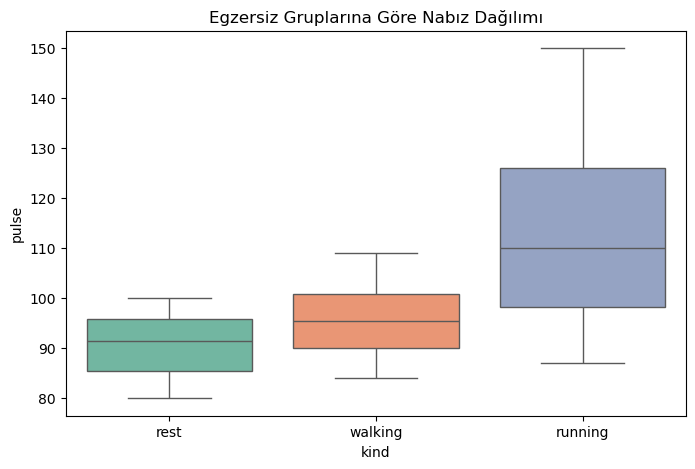

In [61]:
# 1. Egzersiz Gruplarına Göre Nabız Dağılımı
plt.figure(figsize=(8,5))
sns.boxplot(data = exercise, x = 'kind', y = 'pulse', palette  = 'Set2')
plt.title("Egzersiz Gruplarına Göre Nabız Dağılımı")
plt.show()

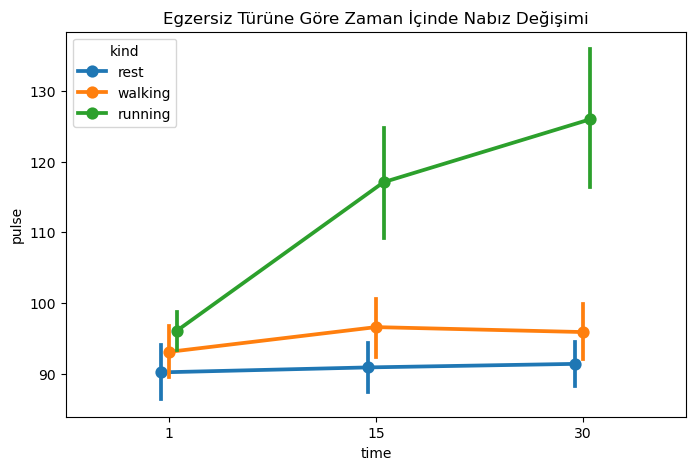

In [56]:
# 2. Egzersiz Türüne Göre Zaman İçinde Nabız Değişimi
plt.figure(figsize=(8,5))
sns.pointplot(data=exercise, x="time", y="pulse", hue="kind", dodge=True)
plt.title("Egzersiz Türüne Göre Zaman İçinde Nabız Değişimi")
plt.show()

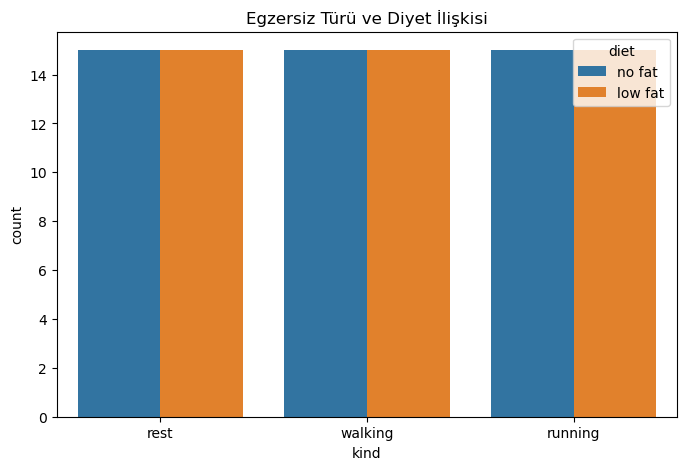

In [78]:
# 3. Diyet ve Egzersiz Türü İlişkisi
plt.figure(figsize=(8,5))
sns.countplot(data=exercise, x="kind", hue="diet")
plt.title("Egzersiz Türü ve Diyet İlişkisi")
plt.show()

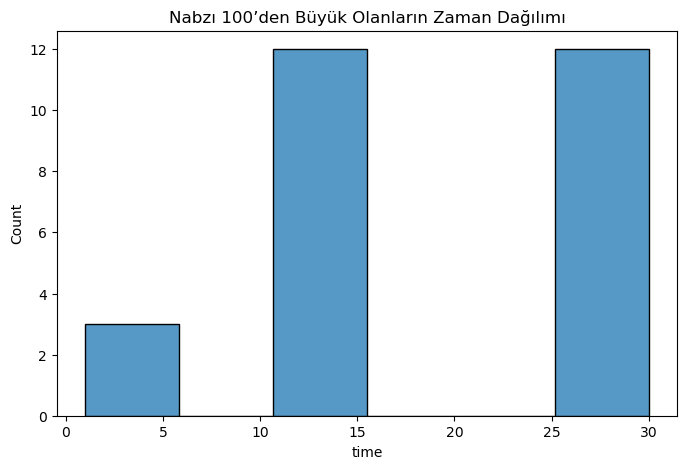

In [67]:
# 4. Nabzı 100’den Büyük Olanların Zaman Dağılımı
plt.figure(figsize=(8,5))
sns.histplot(data = exercise[exercise['pulse'] > 100 ], x = 'time')
plt.title("Nabzı 100’den Büyük Olanların Zaman Dağılımı")
plt.show()

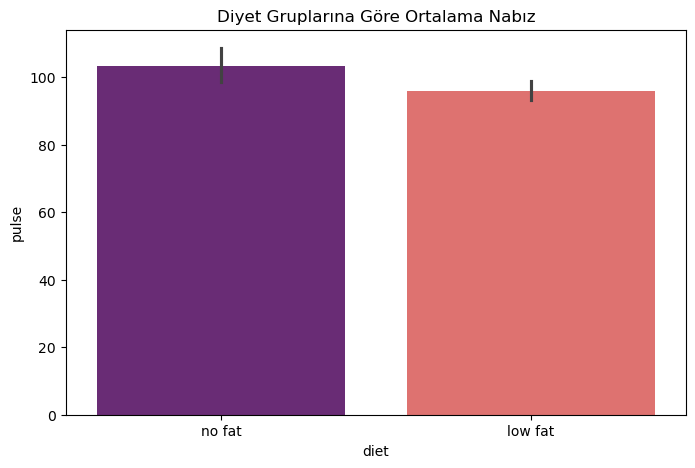

In [53]:
# 5. Diyet Grupları ve Ortalama Nabız
plt.figure(figsize=(8,5))
sns.barplot(data = exercise, x = 'diet', y = 'pulse', palette = 'magma') # estimator default mean() olduğu için değiştirmedik
plt.title("Diyet Gruplarına Göre Ortalama Nabız")
plt.show()

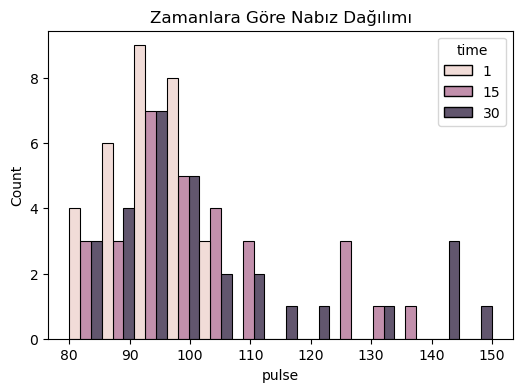

In [68]:
# 6. Zamanlara Göre Nabız Dağılımı
plt.figure(figsize=(6,4))
sns.histplot(data=exercise, x="pulse", hue="time", kde=False, multiple="dodge")
plt.title("Zamanlara Göre Nabız Dağılımı")
plt.show()

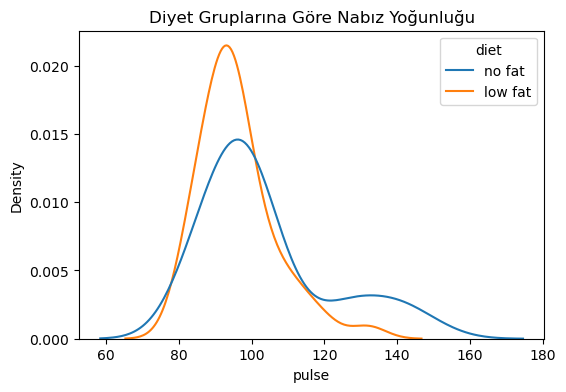

In [75]:
# 7. Diyet Gruplarına Göre Nabız Yoğunluk Eğrisi
plt.figure(figsize=(6,4))
sns.kdeplot(data=exercise, x="pulse", hue="diet")
plt.title("Diyet Gruplarına Göre Nabız Yoğunluğu")
plt.show()

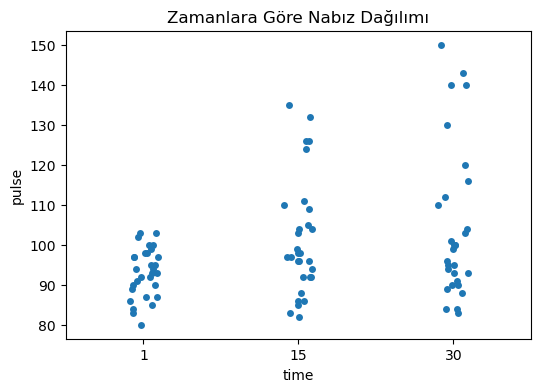

In [72]:
# 8. Zaman – Nabız İlişkisi (stripplot)
plt.figure(figsize=(6,4))
sns.stripplot(data=exercise, x="time", y="pulse", jitter=True)
plt.title("Zamanlara Göre Nabız Dağılımı")
plt.show()

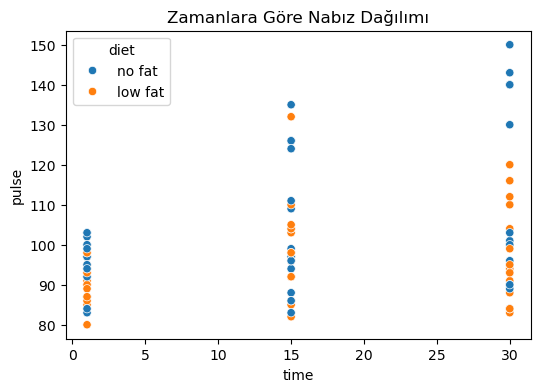

In [71]:
plt.figure(figsize=(6,4))
sns.scatterplot(data = exercise, x = 'time', y = 'pulse', hue = 'diet')
plt.title("Zamanlara Göre Nabız Dağılımı")
plt.show() 